# 1. Введение

## Вспомним как выглядит цикл решения мл-задачи

![crisp-dm](./images/crisp-dm.png)

### Предсказание оттока клиентов

Чтобы потренироваться решать задачу **оттока**, сначала поймем зачем может понадобиться такая задача.

Представим, что у нас есть банк, и клиенты хранят у нас свои деньги, понятно, что мы можем использовать их средства для операций компании. И чем больше у нас запасы, тем больший потенциал у нас есть. Хорошо, получается, нам важен каждый клиент.

Предположим, что всего у нас 100 000 клиентов и каждый хранит на своем счете **1 миллион рублей**. Получается у нас есть **10 миллиардов**. \
**Ого! И это только средств, а сколько мы можем заработать на каждом миллионе!**


![churn2](./images/churn2.png)

А что, если вдруг 10% клиентов от нас уйдет?

**Мы потеряем миллиард рублей средств, да еще и нашу прибыль сократим. \
Нужно стараться удержать наших клиентов, каждый очень ценен!**

Хорошо, мы поняли нашу задачу - это бинарная классификация на два класса **уйдет** клиент из банка или **не уйдет**.
Будем предсказывать вероятность того, что клиент оттечет, то есть число в диапазоне от 0 до 1.


Бизнес выгода ясна, также представим, что данные мы тоже придумали откуда достать.

Теперь нам нужно понять **как же уменьшить наши потери** в миллион до какого-то небольшого числа?

![churn4](./images/churn4.png)

### Составим план действий:

#### 1) Подготовка данных
    * Выборка данных
    * Разведочный анализ данных
    * Очистка данных на основе анализа
    * Генерация вспомогательных данных
    
#### 2) Моделирование
    * Выбор алгоритма	
    * Выбор мета-метрики	
    * План тестирования алгоритма
    * Обучение моделей
    * Оценка качества модели

# 2. Подготовка данных


![churn5](./images/churn5.png)

   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Построение бейзлайна

Выборка данных у нас уже есть - мы будем использовать данные с сайта kaggle для такой же задачи. \
**Ссылка на соревнование:** https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

**Разведочный анализ данных:**
В рамках разведочного анализа данных, его также называют **EDA(Exploratory Data Analysis)**, мы стремимся определить и визуализировать, какие факторы способствуют оттоку клиентов.

In [590]:
#Наши стандартные библиотеки
import numpy as np
import pandas as pd

# Для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [591]:
train = pd.read_csv('C:/Users/Elizaveta\Desktop/ProductStar/Project/data/train.csv')
test = pd.read_csv('C:/Users/Elizaveta\Desktop/ProductStar/Project/data/test.csv')

In [592]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


In [593]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,4801,15679810,Chapman,690,France,Male,39,6,0.00,2,1,0,160532.88
1,2102,15778934,Napolitani,678,Spain,Female,49,8,0.00,2,0,1,98090.69
2,4487,15660646,Fanucci,528,France,Male,35,3,156687.10,1,1,0,199320.77
3,1127,15593973,Wilkie,663,Spain,Female,33,8,122528.18,1,1,0,196260.30
4,383,15568240,Ting,492,Germany,Female,30,10,77168.87,2,0,1,146700.22


![churn8](./images/churn10.png)

In [595]:
from teacher_botchurn_prediction import ChurnPrediction

Это Бот ProductStar он будет проверять твои задания

In [597]:
BotProductStar = ChurnPrediction()

Привет! Приятно познакомиться!


In [598]:
BotProductStar.test_task(df = train)

Думаю...
Ого! Датасет, сейчас мы будем его исследовать, интересно, что в нем.
Сам я не справляюсь - нужна твоя помощь


### Задание 1. Бот тебе его расскажет - запусти ячейку ниже.

In [600]:
BotProductStar.drop_task()

В датафрейме есть несколько колонок, в которых слишком много уникальных значений, нужно их найти и удалить.А получившийся датафрейм передать мне в параметрах.


In [601]:
train.nunique()

RowNumber          7200
CustomerId         7200
Surname            2459
CreditScore         455
Geography             3
Gender                2
Age                  68
Tenure               11
Balance            4566
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    7200
Exited                2
dtype: int64

In [602]:
test.nunique()

RowNumber          800
CustomerId         800
Surname            617
CreditScore        318
Geography            3
Gender               2
Age                 57
Tenure              11
Balance            520
NumOfProducts        4
HasCrCard            2
IsActiveMember       2
EstimatedSalary    800
dtype: int64

![churn8](./images/churn11.png)

In [604]:
train_df = train.drop(['RowNumber', 'CustomerId', 'Surname', 'Balance', 'EstimatedSalary'], axis = 1)
test_df = test.drop(['RowNumber', 'CustomerId', 'Surname', 'Balance', 'EstimatedSalary'], axis = 1)
train_df.nunique()

CreditScore       455
Geography           3
Gender              2
Age                68
Tenure             11
NumOfProducts       4
HasCrCard           2
IsActiveMember      2
Exited              2
dtype: int64

In [605]:
BotProductStar.drop_task(df=train_df)

Думаю...
Ой-ой. Я тебя не понимаю, мне нужен pd.DataFrame без колонок, в которых слишком много уникальных значений


In [606]:
train_df = train_df.drop(['CreditScore'], axis = 1)

In [607]:
BotProductStar.drop_task(df=train_df, answer = train_df)

Думаю...
Думаю...
Кодовая фраза Data
Ура! Первое задание позади!


### Задание 2. Бот тебе его расскажет - запусти ячейку ниже.

In [609]:
 BotProductStar.null_task()

Нужно понять есть ли в датафрейме пропущенные значения и отправить ответ мне
Я понимаю только 'Да' или 'Нет'


In [610]:
train_df.isnull().sum()

Geography         0
Gender            0
Age               0
Tenure            0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
Exited            0
dtype: int64

In [611]:
BotProductStar.null_task(answer='нет') 

Думаю...
Ура! Второе задание позади!
Следующая кодовая фраза Science


   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [x] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных

In [613]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


Данные выглядят, как снимок на определенный момент времени 
Возможно баланс на заданную дату, что **оставляет много вопросов:**
    * Какая это дата и какое значение она имеет?
    * Можно ли получить баланс за определенный период времени, а не за одну дату.
    * Есть клиенты, которые вышли, но все еще имеют остаток на счете! Что бы это значило? Могли они выйти из продукта, а не из банка?
    * Что значит быть активным участником и есть ли в этом разные степени? Может быть, лучше вместо этого предоставить счет транзакций, как по кредитам, так и по дебету счета?
Разбивка на продукты, купленные клиентом, может предоставить дополнительную информацию, которая увеличит список продуктов.


![churn8](./images/churn14.png)

Здесь мы приступаем к моделированию без контекста, хотя обычно наличие контекста и лучшее понимание процесса извлечения данных дает более качественные модели.

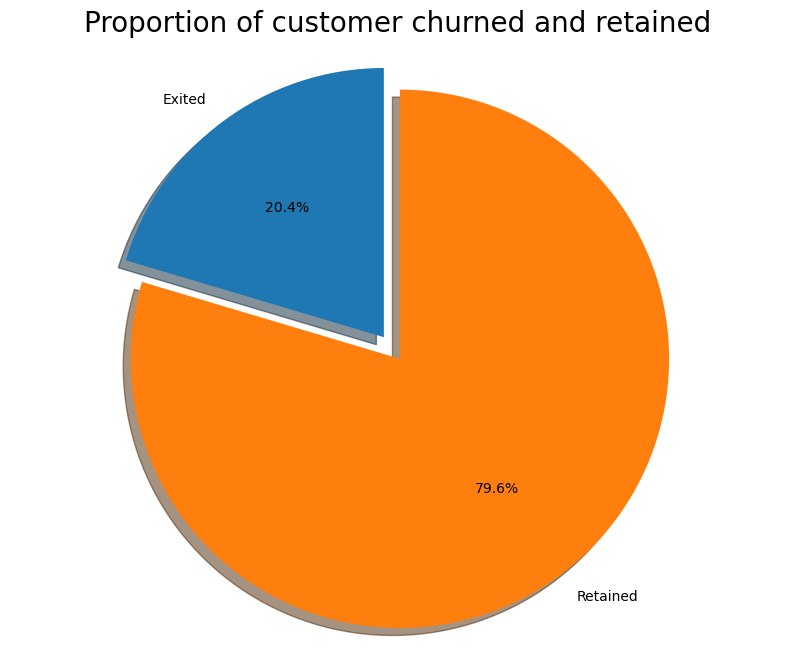

In [617]:
labels = 'Exited', 'Retained'
sizes = [train.Exited[train['Exited']==1].count(), train.Exited[train['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Таким образом, около 20% клиентов ушли. Базовая модель может предполагать, что 20% клиентов уйдут.
Учитывая, что 20% - это небольшое число, нам необходимо убедиться, что выбранная модель действительно предсказывает с большой точностью эти 20%, поскольку для банка интересно идентифицировать и сохранить клиентов.

##### Анализ категориальных переменных

<Axes: xlabel='IsActiveMember', ylabel='count'>

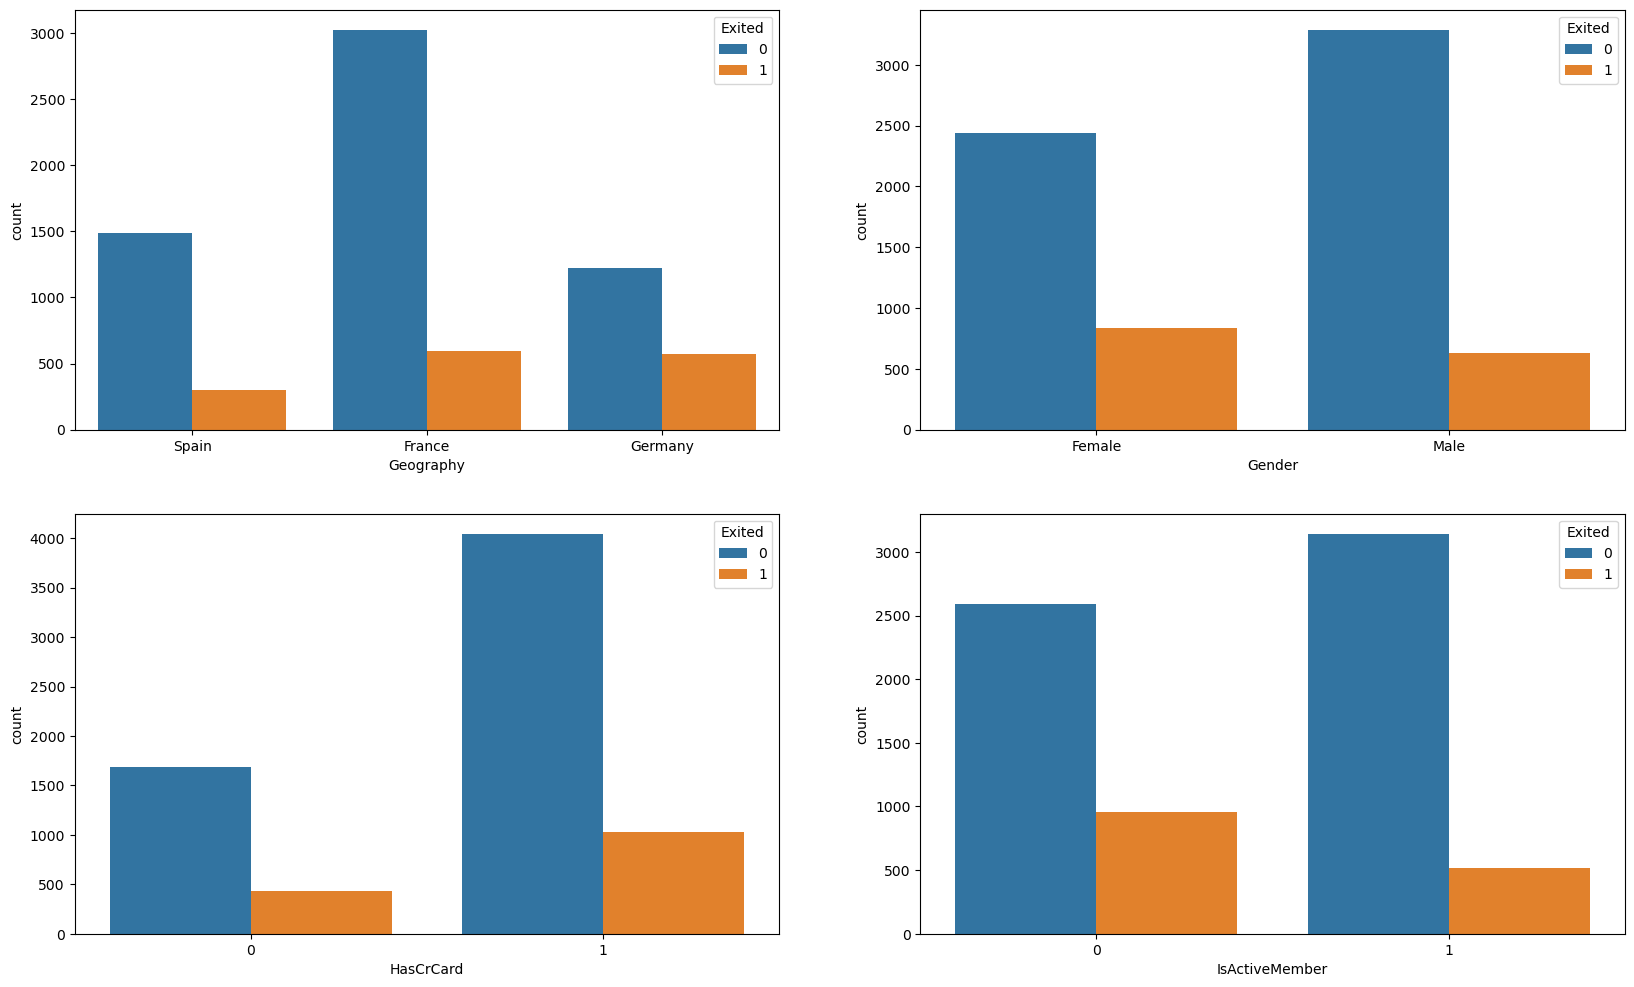

In [620]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = train, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = train, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = train, ax=axarr[1][1])

**Отметим следующее:**

* Большинство данных от лиц из Франции. Возможно, у банка недостаточно ресурсов для обслуживания клиентов в тех областях, где у него меньше клиентов.
* Доля сменяющих клиентов женщин также выше, чем доля клиентов-мужчин.
* Интересно, что большинство клиентов, которые ушли, - это клиенты с кредитными картами. Учитывая, что у большинства клиентов есть кредитные карты, это может оказаться простым совпадением.
* Неудивительно, что у неактивных участников больше отток. 
* Общая доля неактивных клиентов довольно высока, можно предположить, что банку потребуется программа, направленная на превращение этой группы в активных клиентов.

##### Анализ количественных переменных

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

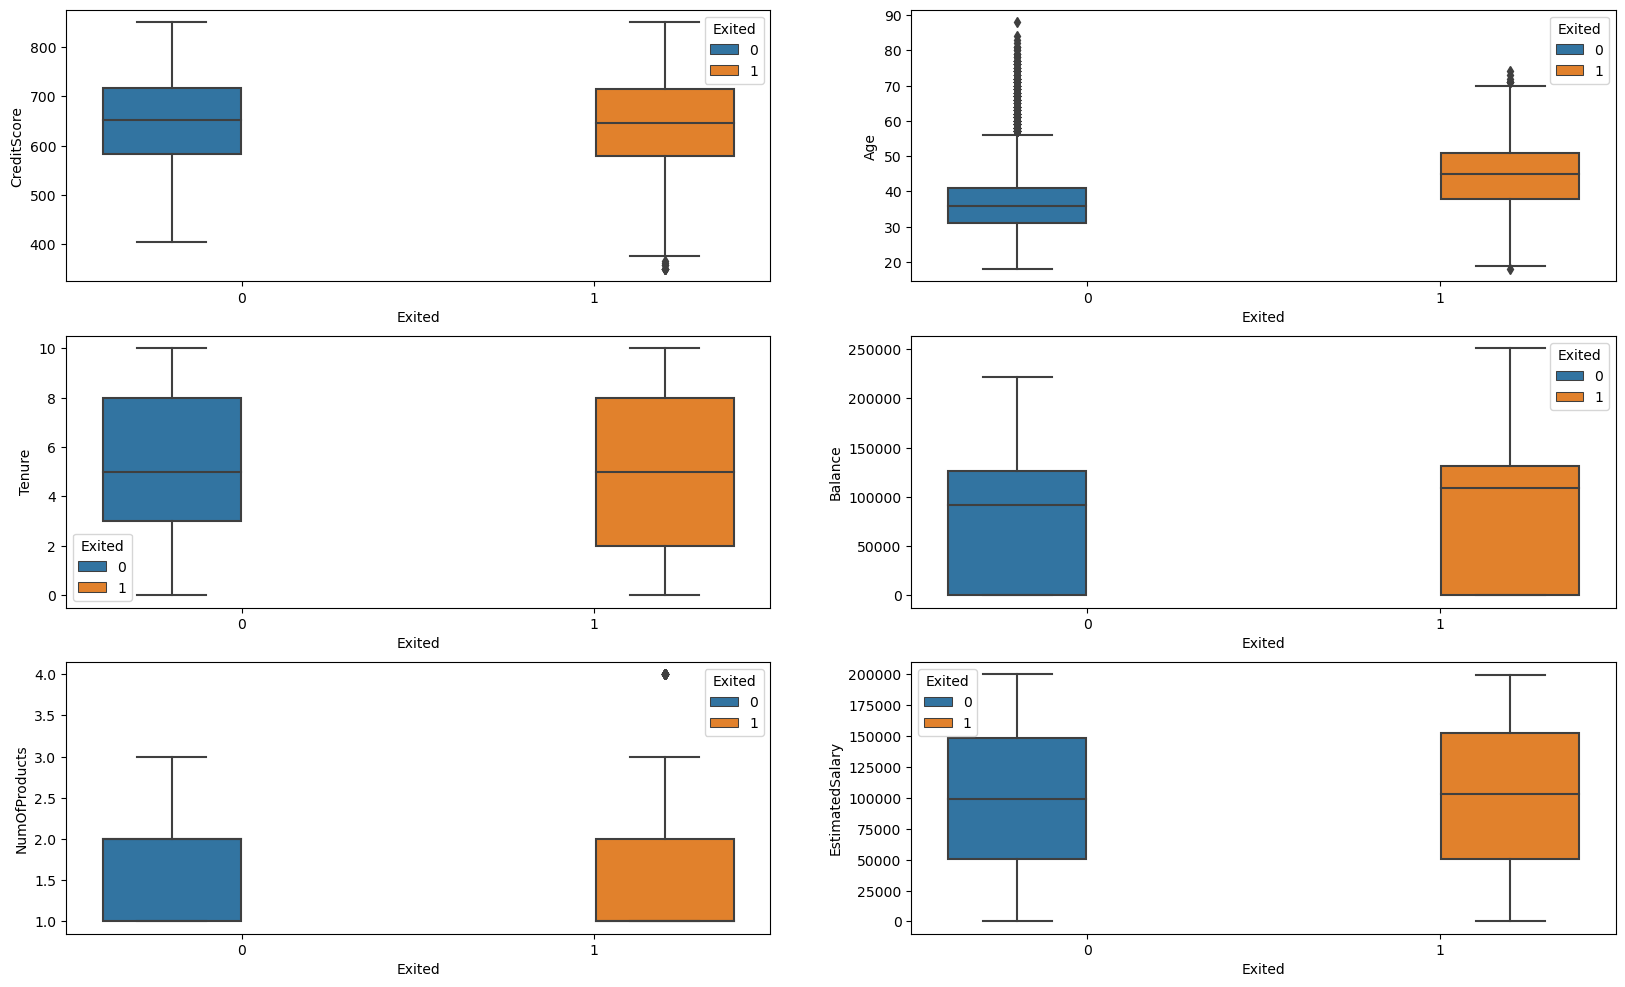

In [623]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = train, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = train , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][1])

**Отметим следующее:**
* Нет существенной разницы в распределении кредитного рейтинга между оставшимися и оттекшими клиентами.
* Старшие клиенты оттекают чаще, чем более молодые, это намекает на разницу в предпочтениях обслуживания в возрастных категориях. Банку может потребоваться пересмотреть свой целевой рынок или пересмотреть стратегию удержания клиентов между разными возрастными группами.
* Что касается срока владения, то клиенты, находящиеся на крайнем конце (мало времени проводившие с банком или много времени в банке), с большей вероятностью уйдут, чем те, которые имеют средний срок.
* Банк теряет клиентов со значительными остатками на банковских счетах, что может снизить их доступный капитал для кредитования.
* Ни продукт, ни зарплата не оказывают существенного влияния на вероятность оттока.

В целом к разведочному анализу данных можно также отнести **построение базового решения**. Важно делать на самом первом этапе, чтобы на пальцах прикидывать, а сколько можно сэкономить денег.

**Например:**
Скажем, чтобы привлечь клиента мы тратим 100 000р, а зарабатываем в год на каждом 200 000р.

In [627]:
from sklearn.metrics import confusion_matrix

In [628]:
#возьмем случайную подвыборку из train и оценим на ней сколько мы экономим
val_sample = train.sample(frac=0.2, random_state=42).reset_index(drop=True)

In [629]:
val_sample.Exited.value_counts()

0    1145
1     295
Name: Exited, dtype: int64

Всего видим, что ушло 295 клиентов. 
Получается мы потеряли 295 000 000р!

Есть ли что-то, что мы могли с этим сделать?

Давайте посчитаем экономию, при предскзаании алгоритмом, который случайно возвращает 0 или 1, то есть с вероятностью 0.5 говорит, что клиент оттечет и с такой же вероятностью, что клиент не оттечет.

Отсюда поймём, а имееют ли смысл вообще акции по привлечению клиентов.

In [632]:
np.random.seed(42)
rand_prediction = np.random.randint(2, size=len(val_sample))

In [633]:
tn, fp, fn, tp = confusion_matrix(val_sample.Exited, rand_prediction).ravel()

In [634]:
print(f'Удержали уходящих: {tp}')
print(f'Удерживали, но они и не собирались уходить: {fp}')
print(f'Не стали удерживать и они ушли: {fn}')
print(f'Правильно не стали удерживать: {tn}')

Удержали уходящих: 145
Удерживали, но они и не собирались уходить: 575
Не стали удерживать и они ушли: 150
Правильно не стали удерживать: 570


Посчитаем сколько мы потратили всего на привлечение:
(145 + 575) * 100 000 =  72 000 000

А сколько потеряли на тех, кто ушел:
150 000 000

Количество денег ушедших из банка **ничего не делали: 295 000 000**\
Количество денег ушедших из банка **простейшей модели: 150 000 000**

**Удержано денег в банке: 145 000 000**\
**При расходах: 72 000 000**

Ого и это мы даже машинное обучение еще не начали использовать! И взяли только 20% от всей выборки.

На этом наш разведочный анализ можно закончить - мы узнали все, что нас интересует.

   - [x] Выборка данных
   - [x] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Предобработка данных

# Домашнее задание

##### С помощью этого метода можно делать посылки боту с предскзаниями, а он будет возвращать результат.

In [642]:
BotProductStar.production_quality()

Я умею оценивать качество на тесте. Метрика, которую я измеряю ROC-AUC.Тут можно отправлять сделанные предсказания. Чтобы я не запутался куда какие предсказания, давай будем присылать в виде датафрейма у которого первая колонка 'RowNumber', а вторая 'predict'. Пример посылки попробуем, когда отправим submission.


Это тестовый пример посылки, вам нужно будет точно также предсказывать вероятность для каждого наблюдения и делать посылки, отправляя их боту.

In [644]:
test = pd.read_csv('./data/test.csv')

In [645]:
submission = test[['RowNumber']].copy()
baseline = [0.5]*len(test)
submission['predict'] = baseline

In [646]:
submission.head()

,RowNumber,predict
0,4801,0.5
1,2102,0.5
2,4487,0.5
3,1127,0.5
4,383,0.5


In [647]:
BotProductStar.production_quality(answer=submission)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.5
Ого! Да это же самое хитрое решение - хоть я и простой бот, но монетку подбросить и наугад сказать даже я смогу.Я уверен - как-то точно можно улучшить предсказания!


Следующая часть урока полностью ложится на ваши плечи:
* Нужно правильно сгенерировать вспомогательные признаки, но сильно можно не увлекаться.
* Правильно их обработать для подачи в модель.
* И построить модель, которая будет давать достаточное качество.

Для защиты проекта необходимо будет построить модель, качество которой дает ROC-AUC не ниже 0.8. Оцениваться модель будет с помощью бота, а точнее функции - `BotProductStar.production_quality(answer=submission)`



submission - это датафрем, в котором в первой колонке указан RowNumber из файла test, а в колонке predict предсказанная вероятность ухода клиента.

Здесь можно продолжить построение модели. Давайте вспомним, какие пункты осталось сделать.

### Подготовка данных
   - [x] Выборка данных
   - [x] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Предобработка данных

####  Моделирование
   - [ ]  Выбор алгоритмов	
   - [ ]  Выбор мета-метрики	
   - [ ]  План тестирования алгоритма
   - [ ]  Обучение моделей
   - [ ]  Оценка качества модели

In [653]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


In [654]:
train_df = train.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
test_df = test.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [655]:
train_df.nunique()

CreditScore         455
Geography             3
Gender                2
Age                  68
Tenure               11
Balance            4566
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    7200
Exited                2
dtype: int64

In [656]:
test_df.nunique()

CreditScore        318
Geography            3
Gender               2
Age                 57
Tenure              11
Balance            520
NumOfProducts        4
HasCrCard            2
IsActiveMember       2
EstimatedSalary    800
dtype: int64

In [657]:
bins = [0, 30, 50, 100]
labels = ['Young', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

In [658]:
train_df['IsSenior'] = (train_df['Age'] >= 65).astype(int)

In [659]:
train_df['HasBalance'] = (train_df['Balance'] > 0).astype(int)

In [660]:
# train_df['BalanceToSalaryRatio'] = train_df['Balance'] / (train_df['EstimatedSalary'] + 1)

In [661]:
train_df['InactiveWithBalance'] = ((train_df['IsActiveMember'] == 0) & (train_df['Balance'] > 0)).astype(int)

In [662]:
train_df['HasMultipleProducts'] = (train_df['NumOfProducts'] > 1).astype(int)

In [663]:
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)

In [664]:
test_df['IsSenior'] = (test_df['Age'] >= 65).astype(int)
test_df['HasBalance'] = (test_df['Balance'] > 0).astype(int)
# test_df['BalanceToSalaryRatio'] = test_df['Balance'] / (test_df['EstimatedSalary'] + 1)
test_df['InactiveWithBalance'] = ((test_df['IsActiveMember'] == 0) & (test_df['Balance'] > 0)).astype(int)
test_df['HasMultipleProducts'] = (test_df['NumOfProducts'] > 1).astype(int)

In [665]:
train_df = train_df.drop(['Balance', 'EstimatedSalary'], axis = 1)
test_df = test_df.drop(['Balance', 'EstimatedSalary'], axis = 1)

In [666]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,AgeGroup,IsSenior,HasBalance,InactiveWithBalance,HasMultipleProducts
0,461,Spain,Female,25,6,2,1,1,0,Young,0,0,0,1
1,619,France,Female,35,4,1,1,1,0,Adult,0,1,0,0
2,699,France,Female,40,8,1,1,0,0,Adult,0,1,1,0
3,558,Germany,Male,41,2,1,1,1,0,Adult,0,1,0,0
4,638,France,Male,34,5,1,0,1,0,Adult,0,1,0,0


In [667]:
train_df.nunique()

CreditScore            455
Geography                3
Gender                   2
Age                     68
Tenure                  11
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
Exited                   2
AgeGroup                 3
IsSenior                 2
HasBalance               2
InactiveWithBalance      2
HasMultipleProducts      2
dtype: int64

In [668]:
train_df = train_df.drop(['CreditScore', 'Age'], axis = 1)
test_df = test_df.drop(['CreditScore', 'Age'], axis = 1)

In [669]:
test_df.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,AgeGroup,IsSenior,HasBalance,InactiveWithBalance,HasMultipleProducts
0,France,Male,6,2,1,0,Adult,0,0,0,1
1,Spain,Female,8,2,0,1,Adult,0,0,0,1
2,France,Male,3,1,1,0,Adult,0,1,1,0
3,Spain,Female,8,1,1,0,Adult,0,1,1,0
4,Germany,Female,10,2,0,1,Young,0,1,0,1


In [670]:
train_df = pd.get_dummies(train_df, columns=['Geography', 'Gender', 'AgeGroup'], drop_first=True)

In [671]:
test_df = pd.get_dummies(test_df, columns=['Geography', 'Gender', 'AgeGroup'], drop_first=True)

In [672]:
X_train = train_df.drop('Exited', axis = 1)
X_test = test_df
y_train = train_df['Exited']

In [673]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [674]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_t, y_val = train_test_split(X_train_sc, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [675]:
from sklearn.linear_model import LogisticRegression

model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_t)
y_pred = model_lgr.predict_proba(x_val)[:, 1]

In [676]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_val, y_pred)
print(f"ROC-AUC score: {auc_score:.4f}")

ROC-AUC score: 0.8392


In [677]:
submission_1 = test[['RowNumber']].copy()
y_pred_test = (model_lgr.predict_proba(X_test)[:, 1])*len(test)
submission_1['predict'] = y_pred_test

C:\anaconda3.1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [678]:
submission_1.head()

,RowNumber,predict
0,4801,328.404431
1,2102,259.851509
2,4487,432.398023
3,1127,425.949318
4,383,213.404312


In [679]:
BotProductStar.production_quality(answer=submission_1)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8012891443787726
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


In [680]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,      # больше деревьев = лучше качество, но дольше обучение
    max_depth=10,          # ограничение глубины деревьев (борется с переобучением)
    min_samples_split=5,   # минимальное количество samples для разделения узла
    min_samples_leaf=2,    # минимальное количество samples в листе
    max_features='sqrt',   # количество features для рассмотрения при разделении
    random_state=42,
    class_weight='balanced',
    n_jobs=-1    
)

rf_model.fit(x_train, y_t)
y_val_pred = rf_model.predict(x_val)         
y_val_proba = rf_model.predict_proba(x_val)[:, 1]  

print("ROC-AUC:", roc_auc_score(y_val, y_val_proba))

ROC-AUC: 0.839399983379041


In [681]:
submission_2 = test[['RowNumber']].copy()
y_pred_rf = (rf_model.predict_proba(X_test)[:, 1])*len(test)
submission_2['predict'] = y_pred_rf

C:\anaconda3.1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [682]:
submission_2

,RowNumber,predict
0,4801,636.325848
1,2102,553.209160
2,4487,171.542562
3,1127,220.759099
4,383,732.097071
5,2487,553.209160
6,3636,636.325848
7,3685,94.999648
8,8789,364.885763
9,5509,636.325848


In [683]:
BotProductStar.production_quality(answer=submission_2)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.4777076080209429
Думаю...
Нужно качество больше 0.80, я верю - у тебя получится!


In [684]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(x_train, y_t)

y_val_proba = xgb_model.predict_proba(x_val)[:, 1]
auc_score = roc_auc_score(y_val, y_val_proba)
print(f"XGBoost ROC-AUC: {auc_score:.4f}")

XGBoost ROC-AUC: 0.8569


C:\Users\Elizaveta\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [685]:
try:
    import xgboost as xgb
    print("XGBoost успешно установлен!")
    print("Версия:", xgb.__version__)
except ImportError as e:
    print("Ошибка импорта:", e)
    print("Попробуйте перезапустить ядро (Kernel -> Restart Kernel)")

XGBoost успешно установлен!
Версия: 3.0.5


In [686]:
submission_3 = test[['RowNumber']].copy()
y_pred_xg = (xgb_model.predict_proba(X_test)[:, 1])*len(test)
submission_3['predict'] = y_pred_xg

In [687]:
BotProductStar.production_quality(answer=submission_3)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.669338515099992
Думаю...
А что если попробовать бустинг?


In [688]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

# Определяем сетку параметров для поиска
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # основной параметр регуляризации
    'penalty': ['l1', 'l2', 'elasticnet', None],  # тип регуляризации
    'solver': ['liblinear', 'saga'],  # алгоритмы, которые поддерживают L1 регуляризацию
    'class_weight': ['balanced', None],  # учет дисбаланса классов
    'l1_ratio': [0.1, 0.5, 0.9]  # для elasticnet - смесь L1 и L2
}

# Создаем модель
lr = LogisticRegression(random_state=42, max_iter=1000)

# Создаем GridSearch
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='roc_auc',  # оптимизируем по ROC-AUC
    cv=5,               # 5-кратная кросс-валидация
    n_jobs=-1,          # использовать все ядра процессора
    verbose=1           # вывод процесса
)

# Запускаем поиск
grid_search.fit(x_train, y_t)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC:", grid_search.best_score_)

# Используем лучшую модель
best_lr_model = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Лучшие параметры: {'C': 1, 'class_weight': None, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Лучший ROC-AUC: 0.8206933908461688


C:\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3.1\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penal

In [689]:
best_lr_model.fit(x_train, y_t)
y_pred_lr = model_lgr.predict_proba(x_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred_lr)
print(f"ROC-AUC score: {auc_score:.4f}")

ROC-AUC score: 0.8392


C:\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [690]:
submission_4 = test[['RowNumber']].copy()
y_pred_lr = (best_lr_model.predict_proba(X_test)[:, 1])*len(test)
submission_4['predict'] = y_pred_lr

C:\anaconda3.1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [691]:
BotProductStar.production_quality(answer=submission_4)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8012801482561016
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


In [692]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Определяем сетку параметров для XGBoost
xgb_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),  # 0.6-1.0
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 2),
    'scale_pos_weight': [1, 5, 10, 20]  # для дисбаланса (примерно 1/0.2 = 5)
}

xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random_search.fit(x_train, y_t)
print("XGBoost лучшие параметры:", xgb_random_search.best_params_)
print("XGBoost лучший ROC-AUC:", xgb_random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost лучшие параметры: {'colsample_bytree': 0.9918042114486034, 'gamma': 0.08766513494466927, 'learning_rate': 0.015148330549525071, 'max_depth': 4, 'n_estimators': 225, 'reg_alpha': 0.8069129770507795, 'reg_lambda': 1.6926086421788016, 'scale_pos_weight': 5, 'subsample': 0.7735406596951893}
XGBoost лучший ROC-AUC: 0.8354771383177119


C:\Users\Elizaveta\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:59:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [693]:
best_xgb_model = xgb_random_search.best_estimator_

In [694]:
best_xgb_model.fit(x_train, y_t)

y_pred_xgb = best_xgb_model.predict_proba(x_val)[:, 1]
auc_score_xgb = roc_auc_score(y_val, y_pred_xgb)
print(f"XGBoost ROC-AUC: {auc_score_xgb:.4f}")

XGBoost ROC-AUC: 0.8629


In [695]:
submission_5 = test[['RowNumber']].copy()
y_pred_xgbfinal = (best_xgb_model.predict_proba(X_test)[:, 1])*len(test)
submission_5['predict'] = y_pred_xgbfinal
BotProductStar.production_quality(answer=submission_5)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.6852976367185744
Думаю...
Нужно качество больше 0.80, я верю - у тебя получится!


In [696]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Определяем сетку параметров для Random Forest
rf_param_dist = {
    'n_estimators': randint(50, 500),           # количество деревьев
    'max_depth': [None] + list(range(5, 30, 5)), # глубина деревьев
    'min_samples_split': randint(2, 20),        # минимальное samples для разделения
    'min_samples_leaf': randint(1, 10),         # минимальное samples в листе
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7], # количество features
    'bootstrap': [True, False],                 # бутстрэп выборки
    'class_weight': ['balanced', 'balanced_subsample', None] # учет дисбаланса
}

rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=100,                                  # количество комбинаций
    scoring='roc_auc',                           # оптимизируем по ROC-AUC
    cv=3,                                        # 3-кратная кросс-валидация
    n_jobs=-1,                                   # использовать все ядра
    random_state=42,
    verbose=1
)

# Запускаем поиск
rf_random_search.fit(x_train, y_t)

print("Random Forest лучшие параметры:", rf_random_search.best_params_)
print("Random Forest лучший ROC-AUC:", rf_random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
48 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3.1\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3.1\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3.1\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in 

Random Forest лучшие параметры: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 440}
Random Forest лучший ROC-AUC: 0.8309650480151397


In [697]:
best_tree_model = rf_random_search.best_estimator_

In [698]:
best_tree_model.fit(x_train, y_t)

y_pred_tree = best_tree_model.predict_proba(x_val)[:, 1]
auc_score_tree = roc_auc_score(y_val, y_pred_xgb)
print(f"XGBoost ROC-AUC: {auc_score_tree:.4f}")

XGBoost ROC-AUC: 0.8629


In [699]:
submission_6 = test[['RowNumber']].copy()
y_pred_treefinal = (best_tree_model.predict_proba(X_test)[:, 1])*len(test)
submission_6['predict'] = y_pred_treefinal
BotProductStar.production_quality(answer=submission_6)

Запускаю тестирование...


C:\anaconda3.1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Проверяю метрики...
Твой результат: 0.47571046878795237
Думаю...
А что если построить случайный лес?
